# PROFITABLE APPS ON BOTH IOS AND ANDROID PLAYSTORE
- In this project we are going to analysize free apps on both 'google playstore' and 'applestore' that generate more income based on 'on-line ads'.
- Below we have transformed our csv files in to lists because list are easy to manipulate.

In [24]:
open_file1 = open('AppleStore.csv' , encoding = 'utf8')
open_file2 = open('googleplaystore.csv', encoding='utf8')
from csv import reader
import matplotlib.pyplot as plt
read_file1 = reader(open_file1)
read_file2 = reader(open_file2)
apple = list(read_file1)
android = list(read_file2)

- In the cell below we're defining are a function that prints the rows in a dataset ,checks if a dataset has columns & rows ands prints the number of rows and colums

In [25]:
def explore_data(dataset,start,end,rows_and_columns=False):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')
    if rows_and_columns:
        print('Number of rows: ' ,len(dataset[1:]))
        print('\n')
        print('Number of columns: ',len(dataset[0]))
        
explore_data(apple,0,5,True)
explore_data(android,0,5,True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


Number of rows:  7197


Number of columns:  16
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Phot

- There are incomplete rows that lacks field value in one of the datasets.
- We are going to build a fuction that generates this row or rows and we shall delete these rows

In [26]:
for row in android[1:]:
    if len(row) != len(android[0]):
        print(row)
        print(android.index(row))
        row_index = android.index(row)
del(android[row_index])
print(android[row_index])
print(len(android))

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']
10473
['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']
10841


# Deplicate Apps
- In the android dataset there exists deplicate apps as we can see below.
- We are going to elimate these apps and leave the one with maximum reviews since our app protability is checked according higher user reviews.
# Deleting deplicate apps
- we assign 2 lists i.e android_clean and already_added
- If n_reviews is the same as the number of maximum reviews of the app name (the number can be found in the reviews_max dictionary) and name is not already in the list already_added (read the solution notebook to find out why we need this supplementary condition) then we append the whole app in android_clean and append the name in already_added for checkup.

In [27]:
unique_apps = []
deplicate_apps = []

for app in android[1:]:
    name = app[0]
    if name in deplicate_apps:
        unique_apps.append(name)
    else:
        deplicate_apps.append(name)

        
print('No of unique apps: ',len(unique_apps))
print('No of deplicate apps: ',len(deplicate_apps))
print('\n')
print('Examples of deplicate apps: ',deplicate_apps[:10])

print('\n')
for app in android[1:]:
    name = app[0]
    if name == 'Instagram':
        print(app)
        
reviews_max = {}

for app in android[1:]:
    name = app[0]
    n_reviews = float(app[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews
        
print(len(reviews_max))

android_clean =[]
already_added =[]

for app in android[1:]:
    name = app[0]
    n_reviews = float(app[3])
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)
explore_data(android_clean,0,2,True)

No of unique apps:  1181
No of deplicate apps:  9659


Examples of deplicate apps:  ['Photo Editor & Candy Camera & Grid & ScrapBook', 'Coloring book moana', 'U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'Sketch - Draw & Paint', 'Pixel Draw - Number Art Coloring Book', 'Paper flowers instructions', 'Smoke Effect Photo Maker - Smoke Editor', 'Infinite Painter', 'Garden Coloring Book', 'Kids Paint Free - Drawing Fun']


['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'V

# Non English apps
- There are apps that use other languages unlike English. We want tot remove these apps and remain generally with apps that use English.
- To do that , general alphabet characters are in ASCII set and stop on 127. Any app name contain characeters beyond 127 will be aliminated
- But some English names contain signs and emojis, to reduce on this error we shall assume a name should have atmost 3 of these characters

In [28]:
def is_english(string):
    non_ascii = 0
    for character in string:
        if ord(character) > 127:
            non_ascii +=1
    if non_ascii > 3:
        return False
    return True
print(is_english('Instagram'))
print(is_english('ع爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

android_english = []
for app in android_clean:
    name = app[0]
    if is_english(name) == True:
        android_english.append(app)
        
apple_english = []
for app in apple[1:]:
    name = app[0]
    if is_english(name) == True:
        apple_english.append(app)

explore_data(android_english,0,4,True)
explore_data(apple_english,0,4,True)

True
False
True
True
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


Number of rows:  9613


Number of columns:  13
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'US

# FREE APPS
- Remember we are considering free apps in our analysis so our final step is to remove apps that are not free.

In [29]:
android_final = []
for app in android_english:
    price = app[7]
    if price =='0':
        android_final.append(app)
explore_data(android_final,0,4,True)

apple_final = []
for app in apple_english:
    price = app[4]
    if price =='0.0':
        apple_final.append(app)
explore_data(apple_final,0,4,True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


Number of rows:  8863


Number of columns:  13
['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558',

# Frequency table in Percentages
- We are going to generate frequency table displays freguencies as percentages 
- Below we have pasted a function display_table in our code. This function displays the table generated in frequency table and displays it as a tuple.
- In the display table the function displays the table in decending order given reverse = 'True' and starts from the highest percentages.
- From our analysis, We can observe than in the applestore games apps lead with the 55.64595660749507% and thus the applestore is dominated with games apps.
- In android store, family apps lead by 18.907942238267147% followed by games with 9.724729241877256%
- From the above observation , on both stores games apps seem to be addictive thus attracting more users and therefore more revenue through ads
- The frequency tables we analyzed below show us that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and fun apps.

In [30]:
def freq_table(data_set,index):
    frequency_table = {}
    total = 0
    for app in data_set:
        value = app[index]
        total += 1
        if value in frequency_table:
            frequency_table[value] += 1
        else:
            frequency_table[value] = 1
    percentage_table = {}
    for key in frequency_table:
        percentage = (frequency_table[key]/total)*100
        percentage_table[key] = percentage
    return percentage_table

def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
        
print('Analysing Apple Genres')
display_table(apple_final,-5)
print('\n')
print('Analysing Android Genres')
display_table(android_final,1)

Analysing Apple Genres
Games : 55.64595660749507
Entertainment : 8.234714003944774
Photo & Video : 4.117357001972387
Social Networking : 3.5256410256410255
Education : 3.2544378698224854
Shopping : 2.983234714003945
Utilities : 2.687376725838264
Lifestyle : 2.3175542406311638
Finance : 2.0710059171597637
Sports : 1.947731755424063
Health & Fitness : 1.8737672583826428
Music : 1.6518737672583828
Book : 1.6272189349112427
Productivity : 1.5285996055226825
News : 1.4299802761341223
Travel : 1.3806706114398422
Food & Drink : 1.0601577909270217
Weather : 0.7642998027613412
Reference : 0.4930966469428008
Navigation : 0.4930966469428008
Business : 0.4930966469428008
Catalogs : 0.22189349112426035
Medical : 0.19723865877712032


Analysing Android Genres
FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.3957

 # --Apps with most users--
 - Now, we'd like to get an idea about the kind of apps with the most users
 - Below we calculate the average of user ratings per app
 - We are going to use a nested for loop
 -  we Start by generating a frequency table for the prime_genre in the apple_final.
 - From our analysis below in the apple genre, music applications have the highest average no of users since most people enjoy listening to music. 

Social Networking : 53078.195804195806
Photo & Video : 27249.892215568863
Games : 18924.68896765618
Music : 56482.02985074627
Reference : 67447.9
Health & Fitness : 19952.315789473683
Weather : 47220.93548387097
Utilities : 14010.100917431193
Travel : 20216.01785714286
Shopping : 18746.677685950413
News : 15892.724137931034
Navigation : 25972.05
Lifestyle : 8978.308510638299
Entertainment : 10822.961077844311
Food & Drink : 20179.093023255813
Sports : 20128.974683544304
Book : 8498.333333333334
Finance : 13522.261904761905
Education : 6266.333333333333
Productivity : 19053.887096774193
Business : 6367.8
Catalogs : 1779.5555555555557
Medical : 459.75


Text(0.5, 1.0, 'Pie charts showing download according to Genre')

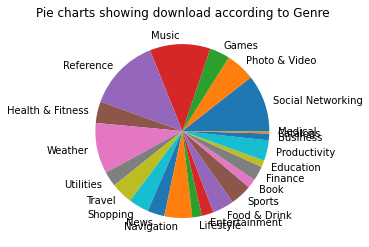

In [31]:
apple_genre = freq_table(apple_final,-5)
genre_list = []
average_list = []
for genre in apple_genre:
    genre_list.append(genre)
    total = 0
    len_genre = 0
    for app in apple_final:
        genre_app = app[-5]
        if genre_app == genre:
            user_rating = float(app[5])
            total += user_rating
            len_genre +=1
    avg = total/len_genre
    average_list.append(avg)
    print(genre, ':' , avg)
    
    
plt.pie(average_list, labels=genre_list)
plt.title("Pie charts showing download according to Genre")

- In this project, we went through a complete data science workflow:

- We started by clarifying the goal of our project.
- We collected relevant data.
- We cleaned the data to prepare it for analysis.
- We analyzed the cleaned data.
- In the solution notebook, we concluded that taking a very popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store market.
- Let me conclude by analysising catergory in android apps below
- The .replace is a fuction that remove','and replaces with space ' ' either way respectively
- By observation below, social apps catergory have the highest number of installs the likes of whatsapp ,facebook,instagram.

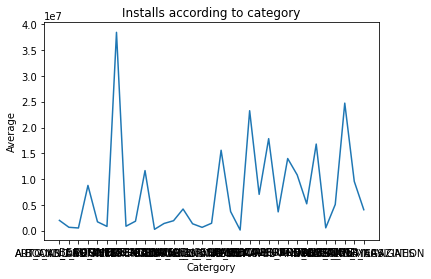

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

In [47]:
catergory_apps = freq_table(android_final,1)
category_type = []
average = []
for catergory in catergory_apps:
    total = len_cate = 0
    for app in android_final:
        catergory_final = app[1]
        if catergory_final == catergory:
            len_cate += 1
            installs = app[5]
            installs = installs.replace(',','')
            installs = installs.replace('+','')
            total += float(installs)
    ave = total/len_cate
    category_type.append(catergory)
    average.append(ave)
    
# plotting the points 
plt.plot(category_type, average)
# naming the x axis
plt.xlabel('Catergory')
# naming the y axis
plt.ylabel('Average')
  
# giving a title to my graph
plt.title('Installs according to category')
  
# function to show the plot
plt.show()

for category, ave in zip(category_type, average):
        print(category,":",ave)


In [33]:
for app in android_final:
    catergory = app[1]
    if catergory == 'SOCIAL' and ( app[5] =='5,000,000+' or app[5] =='50,000,000+' or app[5] =='500,000,000+' ):
        print(app[0],':',app[5])
        
print('\n')

under_100_m = []
for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
print('SUM = ',sum(under_100_m) / len(under_100_m))

Facebook Lite : 500,000,000+
Telegram X : 5,000,000+
Hide Something - Photo, Video : 5,000,000+
Web Browser & Fast Explorer : 5,000,000+
VidStatus app - Status Videos & Status Downloader : 5,000,000+
SPARK - Live random video chat & meet new people : 5,000,000+
Meet – Talk to Strangers Using Random Video Chat : 5,000,000+
Text Free: WiFi Calling App : 5,000,000+
ooVoo Video Calls, Messaging & Stories : 50,000,000+
Whisper : 5,000,000+
Blogger : 5,000,000+
Snapchat : 500,000,000+
MeetMe: Chat & Meet New People : 50,000,000+
Timehop : 5,000,000+
Nextdoor - Local neighborhood news & classifieds : 5,000,000+
Zello PTT Walkie Talkie : 50,000,000+
Meetup : 5,000,000+
POF Free Dating App : 50,000,000+
SKOUT - Meet, Chat, Go Live : 50,000,000+
Instachat 😜 : 5,000,000+
Fame Boom for Real Followers, Likes : 5,000,000+
HOLLA Live: Meet New People via Random Video Chat : 5,000,000+
Hornet - Gay Social Network : 5,000,000+
Who Viewed My Facebook Profile - Stalkers Visitors : 5,000,000+
FunForMobile